In [86]:
import numpy as np
# import scikit
# from keras.models import Sequential
# from keras.layers import Dense
import pdb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from numpy.core.umath_tests import inner1d

The data being used here is a join of the data from the table with information about all officers and the table with tactical response report data that corresponds to reports made by officers when a chargesheet or encounter is taken. The join done on the data was through a tool trifacta with the join index being ID which correpsonds to officer ID.

In [89]:
df = pd.read_csv("MACHINE LEARNING/combined_db.csv")

In [90]:
# Seeing a description of the table before encoding values
df.describe()

,trr_id,officer_id,beat,number_of_officers_using_firearm,action_category
count,520879.000000,520879.000000,520879.000000,520879.000000,270470.000000
mean,49408.464231,17274.667806,1189.255589,0.040134,2.213029
std,29360.625995,9900.034034,686.578221,0.348506,1.690767
min,4.000000,1.000000,0.000000,0.000000,0.000000
25%,21996.000000,8668.000000,624.000000,0.000000,1.000000
50%,50653.000000,17606.000000,1112.000000,0.000000,3.000000
75%,76253.000000,25888.000000,1651.000000,0.000000,4.000000
max,96450.000000,32462.000000,4100.000000,10.000000,6.000000


From the above dataframe description we can see that in the data provided we don't have all the value encoded. Before we begin attempts to classify the data we first encode all the remaining columns so that the decision tree model can be applied on the encoded labels.

In [91]:
g = df.columns.to_series().groupby(df.dtypes).groups   
for key in g:
#     print(key)
    if key == 'int64':
        for col in g[key]:
#             print(key, col)
            df[col] = df[col].fillna(value = 0)
    if key == 'float64':
        for col in g[key]:
#             print(key, col)
            df[col] = df[col].fillna(value = 0.0)
    if key == 'object':
        for col in g[key]:
#             print(key, col)
            df[col] = df[col].fillna('0')

df = df.apply(LabelEncoder().fit_transform)

In [92]:
df.describe()

,trr_id,officer_id,beat,block,direction,street,location,indoor_or_outdoor,party_fired_first,firearm_used,number_of_officers_using_firearm,subject_injured,gender,race,resistance_type,action,action_category,resistance_level
count,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000,520879.000000
mean,33447.323453,5589.642116,140.475101,82.602272,3.009624,675.351101,66.531599,1.661290,0.100050,0.015664,0.040134,1.282042,0.891067,2.947911,4.015428,18.664592,1.149131,1.566293
std,19256.407304,3203.693351,83.529864,33.558129,0.902685,345.663636,22.000552,0.564854,0.349573,0.124172,0.348506,0.452318,0.311556,1.307213,2.277441,8.864466,1.645282,1.821547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16798.000000,2814.000000,68.000000,59.000000,2.000000,399.000000,69.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,11.000000,0.000000,0.000000
50%,33404.000000,5663.000000,131.000000,82.000000,3.000000,689.000000,78.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,6.000000,21.000000,0.000000,1.000000
75%,50194.500000,8391.000000,202.000000,108.000000,4.000000,978.000000,81.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,6.000000,25.000000,3.000000,4.000000
max,66731.000000,10797.000000,304.000000,144.000000,4.000000,1243.000000,89.000000,2.000000,3.000000,1.000000,10.000000,2.000000,1.000000,4.000000,6.000000,33.000000,6.000000,4.000000


In [93]:
# df = df.drop(["trr_id", "resistance_level"], axis = 1)
X = df.drop("action_category", axis = 1)
Y = df["action_category"]
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=10, min_samples_leaf=5, max_features="sqrt")


In [94]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)
# acc = []
# for i in range(0,100):
#     pred_gini = clf_gini.predict(X_test)
#     acc.append(accuracy_score(y_test,pred_gini)*100)

scores_cv_dt = cross_val_score(clf_gini, X, Y, cv=10)

In [95]:
print(scores_cv_dt)

[0.94878292 0.90635439 0.80251488 0.92121177 0.90245167 0.90796168
 0.8887033  0.91439158 0.94438045 0.98345045]


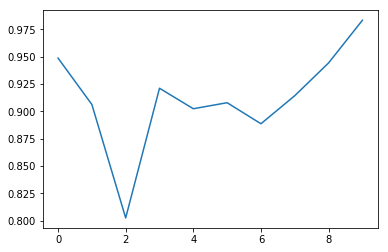

In [96]:
# Plotting Cross validation scores over 10 different folds
plt.figure()
plt.plot(scores_cv_dt)
plt.show()

In [97]:
total_acc = scores_cv_dt.sum()
total_acc = (total_acc/len(scores_cv_dt))*100

print("Hence we can see that the aggregate accuracy of the trained model from a 10 fold cross validation is: " + str(round(total_acc, 2))+ "%")

Hence we can see that the aggregate accuracy of the trained model from a 10 fold cross validation is: 91.2%


Now to test a different tree model on the given data, a random forrest classifier:

In [98]:
clf_gini.fit(X,Y)
importances = clf_gini.feature_importances_
cols = X.columns
print("Importance of columns calculated from decision tree classifier")
for i in range(len(cols)):
    print(cols[i], ":",importances[i])

Importance of columns calculated from decision tree classifier
trr_id : 0.0003271496583899496
officer_id : 0.0001360847520996717
beat : 0.00017675759810244606
block : 0.00018423853888999793
direction : 2.616737092598607e-05
street : 0.00011295440024822472
location : 0.00010145070064991307
indoor_or_outdoor : 0.00042729037075559645
party_fired_first : 0.0013122254266200914
firearm_used : 0.0015984175847895388
number_of_officers_using_firearm : 0.00024364588975767792
subject_injured : 0.00013572143616758954
gender : 4.325346168830338e-05
race : 9.906723953474407e-05
resistance_type : 0.21371782828893815
action : 0.36724929851129096
resistance_level : 0.4141084487711512


On further making the classifier more accurate we removed some columns that seemed obvious for the classifier to take into account: we remove the columns of resistance_type, action and resistance_level. This is done to see the pure correlation between brutality and attributes such as race, beat, gender, officer etc. and not the labels that can directly imply the action level (action_category). 

In [99]:
X2 = df.drop(["action_category", "action", "resistance_type"], axis = 1)
Y2 = df["action_category"]
clf_gini2 = DecisionTreeClassifier(criterion = "gini", max_depth=10, min_samples_leaf=5, max_features="sqrt")

In [100]:
scores_cv_dt2 = cross_val_score(clf_gini2, X2, Y2, cv=10)

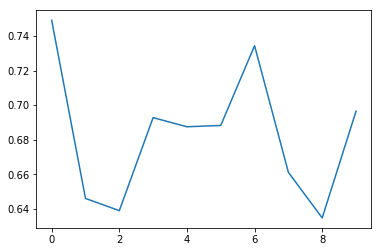

In [101]:
plt.figure()
plt.plot(scores_cv_dt2)
plt.show()

In [102]:
total_acc2 = scores_cv_dt2.sum()
total_acc2 = (total_acc2/len(scores_cv_dt2))*100

print("Hence we can see that the aggregate accuracy of the trained model from a 10 fold cross validation is: " + str(round(total_acc2, 2))+ "%")

clf_gini2.fit(X2,Y2)
importances2 = clf_gini2.feature_importances_
cols = X2.columns
print("Importance of columns calculated from decision tree classifier")
for i in range(len(cols)):
    print(cols[i], ":",importances2[i])

Hence we can see that the aggregate accuracy of the trained model from a 10 fold cross validation is: 68.29%
Importance of columns calculated from decision tree classifier
trr_id : 0.001921152552104256
officer_id : 0.0007199211163702451
beat : 0.0007378028465019854
block : 0.0004674064294311893
direction : 9.053183860315445e-05
street : 0.0003028304402119694
location : 0.0006673798868898555
indoor_or_outdoor : 0.00021930887188687922
party_fired_first : 0.004867456735605767
firearm_used : 0.003926739187524076
number_of_officers_using_firearm : 0.000298988234952021
subject_injured : 0.0011901800496991611
gender : 7.124647907324646e-05
race : 0.0001187873511386164
resistance_level : 0.9844002679800077


From the above feature importance we can see that knowing a certain type of resistance along with the gender are importance features to predict the action level here. In scope of the brutality label concept, we should see that any action level greater than 4 is classified as a case of police brutality.

We will now try a different decision tree based classifier called Random Forest classifier whose package we take from sklearn again. The random forest is a collection of decision trees

In [104]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
scores_cv_dt2 = cross_val_score(rfc, X, Y, cv=10)

In [105]:
total_acc3 = scores_cv_dt2.sum()
total_acc3 = (total_acc3/len(scores_cv_dt2))*100

print("Hence we can see that the aggregate accuracy of the trained model from a 10 fold cross validation is: " + str(round(total_acc3, 2))+ "%")

rfc.fit(X2,Y2)
importances2 = clf_gini2.feature_importances_
cols = X2.columns
print("Importance of columns calculated from decision tree classifier")
for i in range(len(cols)):
    print(cols[i], ":",importances2[i])

Hence we can see that the aggregate accuracy of the trained model from a 10 fold cross validation is: 80.16%
Importance of columns calculated from decision tree classifier
trr_id : 0.001921152552104256
officer_id : 0.0007199211163702451
beat : 0.0007378028465019854
block : 0.0004674064294311893
direction : 9.053183860315445e-05
street : 0.0003028304402119694
location : 0.0006673798868898555
indoor_or_outdoor : 0.00021930887188687922
party_fired_first : 0.004867456735605767
firearm_used : 0.003926739187524076
number_of_officers_using_firearm : 0.000298988234952021
subject_injured : 0.0011901800496991611
gender : 7.124647907324646e-05
race : 0.0001187873511386164
resistance_level : 0.9844002679800077


It is but obvious, but no we can see that the random forest classifier gets us a decent accuracy of about 80% from the 10 folds we classified on.

To further test the data we will now work on it with a Multi-Layer Perceptron model to see if we can achieve better accuracy. The multi-layer perceptron model being implmented here is also from the sklearn library. Further description of the model: activation function used - logistic, learning-rate - adaptive, and the number of layers are kept small initally then increased in further testing fue to processing power limitation.

In [108]:
MLP = MLPClassifier(max_iter=100, activation = "logistic", learning_rate = "adaptive")
MLP.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [107]:
scores_cv_MLP = cross_val_score(MLP, X2, Y2, cv=10)

In [111]:
agg_score = scores_cv_MLP.sum()/len(scores_cv_MLP)
print("The aggregated accuracy of a multi-layer perceptron model is: " + str(round(agg_score*100, 2)))

The aggregated accuracy of a multi-layer perceptron model is: 59.53


Thus from all the models run above we can see that a decision tree based model works best on classifying the severity of the action in each case reported. From out definitions, we know that any action level greater than 4 is idetified as cases of police brutality. To conclude from the random forest classifier, the gender and resistance type are the two most important features in the data set that help us predict the action level of a given incident.